In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# object class # self = instance value
class Linear_Regression():
    
    # initiating the hyper parameters
    def __init__(self, learning_rate, no_of_iterations):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):

        # number of training Examples and number of features
        self.m, self.n = X.shape # no of rows and columns

        # initiating and the W and b
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
            
    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # calculating the gardients
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction))/self.m
        db = -(2 * np.sum(self.Y - Y_prediction))/self.m

        # updating
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self, X):
        return X.dot(self.w) + self.b

In [3]:
data = pd.read_csv("salary_data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df = data.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle to ensure randomness
df_test = df.sample(frac=0.2, random_state=42)
df_train = df.drop(df_test.index)

In [8]:
X_train, Y_train = df_train.drop(columns=["Salary"]).values, df_train["Salary"].values
X_test, Y_test = df_test.drop(columns=["Salary"]).values, df_test["Salary"].values

In [9]:
# training the linear regression model
model = Linear_Regression(learning_rate = 0.001, no_of_iterations = 10000)

In [10]:
model.fit(X_train, Y_train)

In [11]:
# printing the parameters
print("weight = ", model.w[0]) 
print("bias = ", model.b)

weight =  9555.685676640867
bias =  25743.93352762079


In [12]:
print(model.predict(X_test))

[ 68744.5190725  101233.85037308 126078.63313235  40077.46204258
  63966.67623418  36255.18777193]


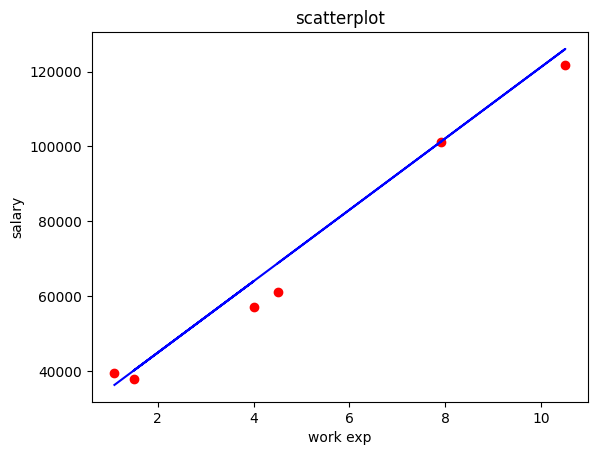

In [13]:
# Visualization
plt.scatter(X_test, Y_test, color = 'red');
plt.plot(X_test, model.predict(X_test), color = 'blue');
plt.xlabel("work exp")
plt.ylabel("salary")
plt.title("scatterplot")
plt.show()